## The Sales team of an online store is requesting to
### 1. Build the predictive model to estimate price elasticity for each SKU
### 2. Providing the pricing plan for the following year by date for the top 10 skus (pricing_plan.csv), the sales team’s objective is to increase overall revenue with the new plan.  Put together a demand forecast by date and by SKU and discuss your overall findings.  Be sure to incorporate any relevant trends that are carrying over from the previous year to update the forecast as well.  

## Dataset is available from the  UCI Machine Learning Repository (Online Retail)

## https://archive.ics.uci.edu/dataset/352/online+retail


In [1]:
#import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#load the dataset
retail_df = pd.read_excel("Online Retail.xlsx", engine='openpyxl')

### Focus on the UK and the top 20 items in total revenue.

/Users/shivarahimipour/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Top 20 items in total revenue
      StockCode  TotalRevenue
4054       DOT     206245.48
1269     22423     134405.94
2515     47566      92501.73
3666    85123A      92179.10
3655    85099B      84516.44
964      22086      61888.19
2733     84879      54662.15
2588     79321      52986.86
1343     22502      50218.42
1068     22197      48214.77
325      21137      39387.00
1903     23084      37894.16
1238     22386      37754.82
2100     23298      37259.82
2017     23203      36168.88
2086     23284      35469.34
2599     82484      34960.97
992      22114      31888.99
1049     22178      31683.17
1312     22469      31186.55
Original Dataset size:
 (541909, 8)
UK with top items Dataset size:
 (22486, 9)


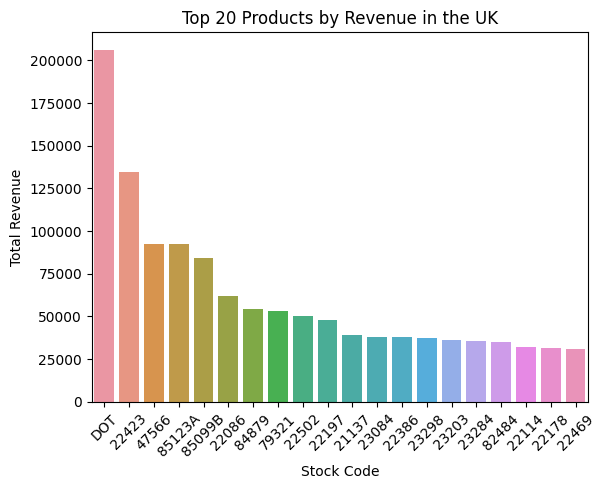

In [2]:
uk_retail_df = retail_df[retail_df['Country'] == 'United Kingdom']
uk_retail_df['TotalRevenue'] = uk_retail_df['Quantity'] * uk_retail_df['UnitPrice']
top20_items = uk_retail_df.groupby(['StockCode'])['TotalRevenue'].sum().reset_index().sort_values(by='TotalRevenue', ascending=False).head(20)
print("Top 20 items in total revenue\n",top20_items.sort_values(by='TotalRevenue', ascending=False))
#Filter the original dataframe
uk_retail_df = uk_retail_df[uk_retail_df['StockCode'].isin(top20_items['StockCode'])]
print("Original Dataset size:\n", retail_df.shape)
print("UK with top items Dataset size:\n", uk_retail_df.shape)


sns.barplot(x=top20_items.StockCode, y=top20_items.TotalRevenue)
plt.xticks(rotation=45)
plt.xlabel("Stock Code")
plt.ylabel("Total Revenue")
plt.title("Top 20 Products by Revenue in the UK")

plt.show()

# Exploratory Data Analysis

### Basic info

In [3]:
#basic structure and stats
print(uk_retail_df.columns,"\n")
print(uk_retail_df.head(5),"\n")
print(uk_retail_df.describe(),"\n") #negative quantity and unitprice!
print(uk_retail_df.shape,"\n") # (22486, 8)
print(uk_retail_df.count(),"\n") # customerID and description has missing values
#percentage of null customerIDs
nullCust = round(uk_retail_df['CustomerID'].isnull().sum() * 100 / len(uk_retail_df),2)
print("Percentage of null customers: ", nullCust,"%" ) #19.69  %

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue'],
      dtype='object') 

   InvoiceNo StockCode                         Description  Quantity  \
0     536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
9     536367     84879       ASSORTED COLOUR BIRD ORNAMENT        32   
46    536371     22086     PAPER CHAIN KIT 50'S CHRISTMAS         80   
49    536373    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
66    536375    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalRevenue  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom         15.30  
9  2010-12-01 08:34:00       1.69     13047.0  United Kingdom         54.08  
46 2010-12-01 09:00:00       2.55     13748.0  United Kingdom        204.00  
49 2010-12-01 09:02:00       2.55     17850.0  United Kingdom         15.30  
66 2010-12-01 09

### Best-Selling Products by Quantity and Revenue

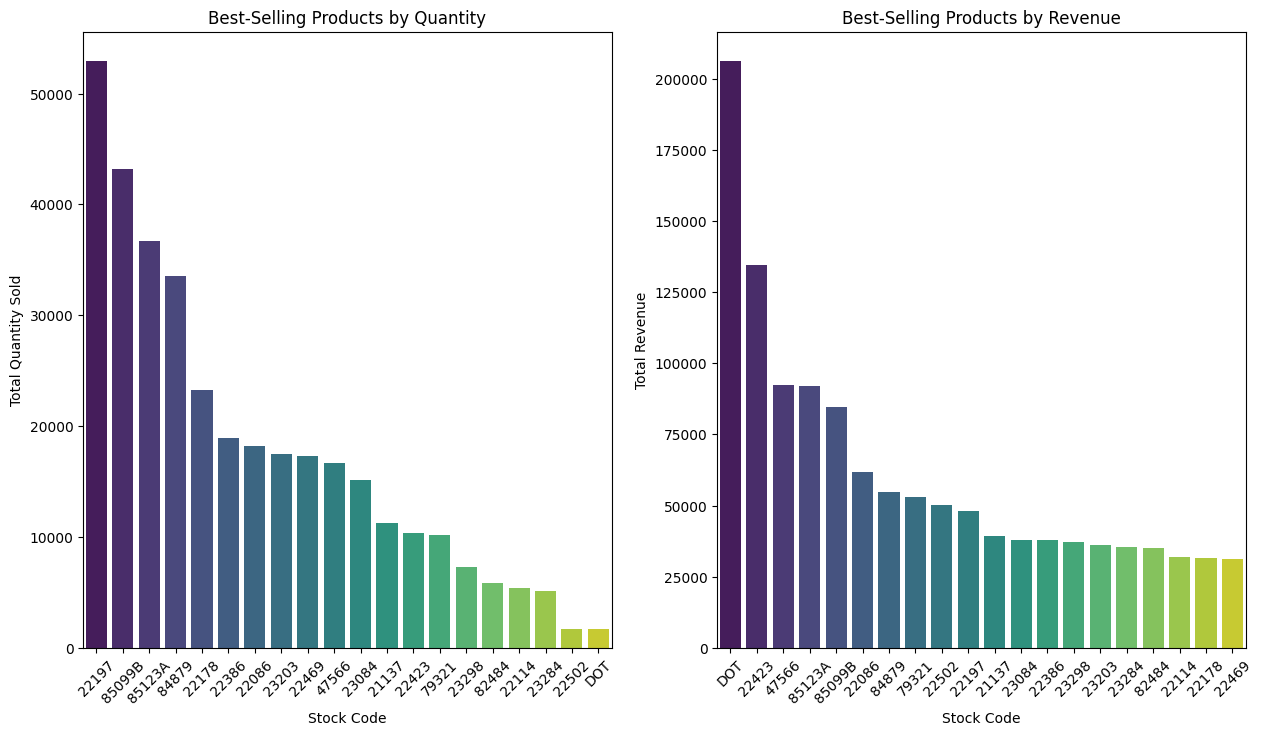

In [4]:
# Top 20 items in quanity - UK data set
top20_quanity_UK = uk_retail_df.groupby(['StockCode'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(20)
#print("Top 20 items by quanitity (UK dataset)\n", top20_quanity_UK)


# Top 20 items in revenue - UK data set
top20_revenue_UK = uk_retail_df.groupby(['StockCode'])['TotalRevenue'].sum().reset_index().sort_values(by='TotalRevenue', ascending=False).head(20)
#print("Top 20 items by revenue (UK dataset)\n", top20_revenue_UK)

plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
sns.barplot(x=top20_quanity_UK.StockCode, y=top20_quanity_UK.Quantity, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Stock Code")
plt.ylabel("Total Quantity Sold")
plt.title("Best-Selling Products by Quantity")

plt.subplot(1, 2, 2)
sns.barplot(x=top20_revenue_UK.StockCode, y=top20_revenue_UK.TotalRevenue, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Stock Code")
plt.ylabel("Total Revenue")
plt.title("Best-Selling Products by Revenue")

plt.show()

### Mostly Cancelled Products

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
4882,C536815,22178,VICTORIAN GLASS HANGING T-LIGHT,-1,2010-12-02 17:05:00,1.25,14443.0,United Kingdom,-1.25
4938,C536825,22197,SMALL POPCORN HOLDER,-2,2010-12-02 17:27:00,0.85,15384.0,United Kingdom,-1.70
12402,C537373,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-06 12:55:00,12.75,14487.0,United Kingdom,-12.75
12539,C537383,22197,SMALL POPCORN HOLDER,-1,2010-12-06 13:17:00,0.85,16550.0,United Kingdom,-0.85
13053,C537414,22086,PAPER CHAIN KIT 50'S CHRISTMAS,-6,2010-12-06 15:09:00,2.95,16861.0,United Kingdom,-17.70


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue


Percentage of cancelled orders: 3.59  %
Top items in cancelled orders
    StockCode  Count
0      22423    148
1      22197     44
2     85099B     41
3     85123A     40
4      22178     25
5      47566     19
6      23203     16
7      22386     13
8      23084     13
9      84879     11
10     22469     11
11     23298     10
12     82484     10
13     22086      9
14     22502      8
15     23284      7
16     79321      6
17     21137      5
18     22114      5
19       DOT      1


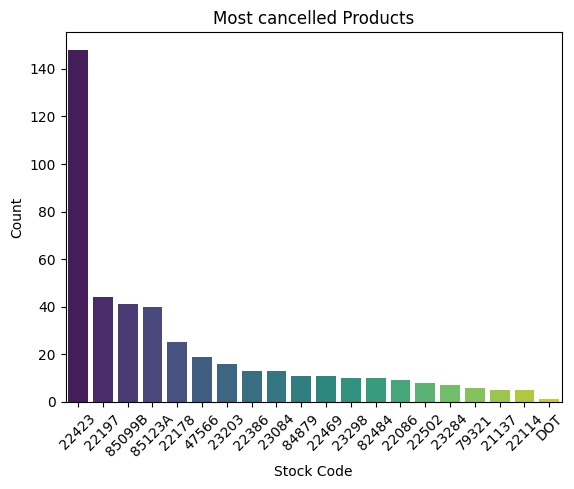

In [5]:
# Percentage of cancelled orders
# If InvoiceNo starts with letter 'c', it indicates a cancellation
canceled_df = uk_retail_df[uk_retail_df['InvoiceNo'].astype(str).str.startswith('C')]
display(canceled_df.head(5))
# check if there is an InvoiceNo starting with 'c' but with nonnegative Quantity
canceled_df_check = canceled_df[canceled_df['Quantity']>0]
display(canceled_df_check.head(5))

#percentage of cancelled orders
cancelledOrder = (canceled_df['InvoiceNo'].nunique() * 100 / uk_retail_df['InvoiceNo'].nunique())
print('Percentage of cancelled orders: {:.2f}' .format(cancelledOrder)," %" ) #14.81 %

#top items among the cancelled orders
top_cancelled_items = canceled_df['StockCode'].value_counts().reset_index()
top_cancelled_items.columns = ['StockCode', 'Count']
print("Top items in cancelled orders\n", top_cancelled_items)

sns.barplot(x=top_cancelled_items.StockCode, y=top_cancelled_items.Count, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Stock Code")
plt.ylabel("Count")
plt.title("Most cancelled Products")

plt.show()

### Distribution of Order Values

             InvoiceDate  Order Value
4338 2011-06-10 15:28:00     38970.00
8511 2011-11-07 17:42:00     12691.45
8854 2011-11-14 17:55:00     10775.00
5687 2011-08-04 18:06:00      6081.00
893  2011-01-11 08:43:00      5889.48
             InvoiceDate  Order Value
7532 2011-10-11 11:01:00       -870.0
647  2010-12-17 09:37:00      -1275.0
7253 2011-10-03 16:49:00      -1416.0
6059 2011-08-22 17:10:00      -1642.5
2918 2011-04-18 13:08:00      -4921.5


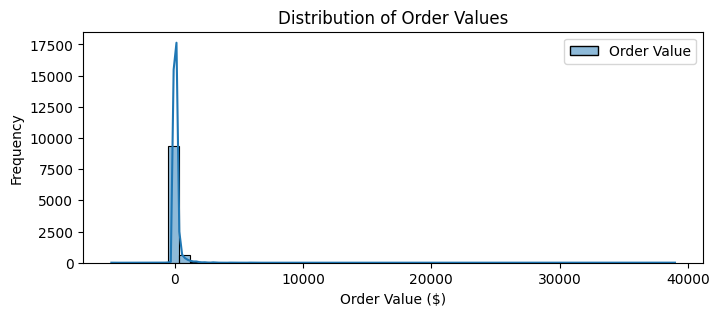

In [6]:
order_values = uk_retail_df.groupby('InvoiceDate')['TotalRevenue'].sum().reset_index()
order_values.columns = ['InvoiceDate','Order Value']
order_values=order_values.sort_values(by='Order Value',ascending=False)
print(order_values.head(5))
print(order_values.tail(5))

plt.figure(figsize=(8, 3))
sns.histplot(order_values, bins=50, kde=True, color='purple')
plt.xlabel("Order Value ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Order Values")
plt.show()

### Trend in Sales

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


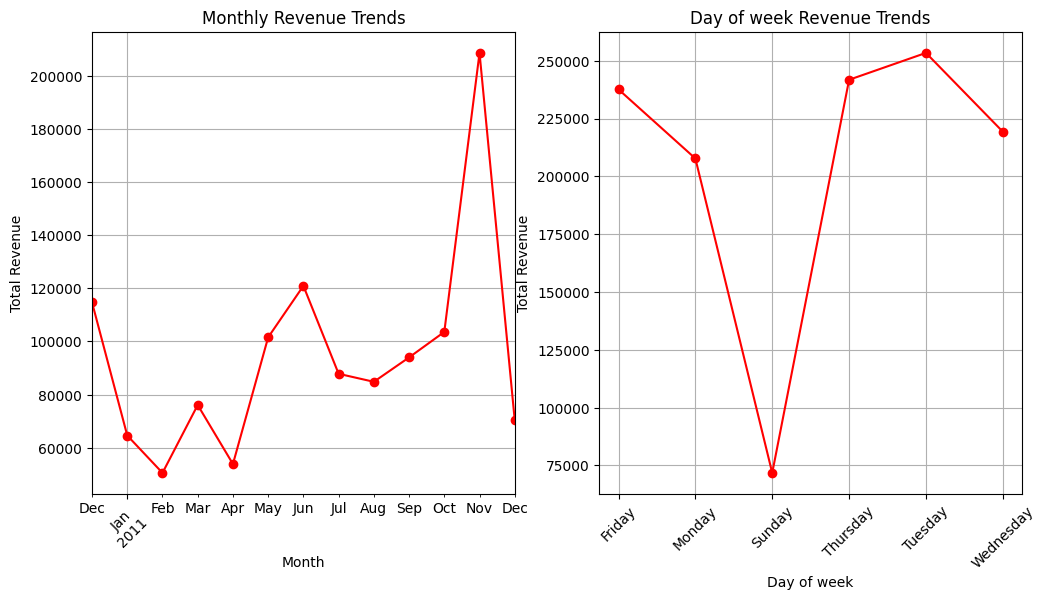

In [7]:
uk_retail_df['InvoiceDate'] = pd.to_datetime(uk_retail_df['InvoiceDate'])
uk_retail_df['Month_name'] = uk_retail_df['InvoiceDate'].dt.to_period("M")
uk_retail_df['DayOfWeek_name'] = uk_retail_df['InvoiceDate'].dt.day_name()


monthly_revenue = uk_retail_df.groupby('Month_name')['TotalRevenue'].sum()
dayofweek_revenue = uk_retail_df.groupby('DayOfWeek_name')['TotalRevenue'].sum()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
monthly_revenue.plot(marker='o', color='red')
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trends")
plt.xticks(rotation=45)
plt.grid()

plt.subplot(1, 2, 2)
dayofweek_revenue.plot(marker='o', color='red')
plt.xlabel("Day of week")
plt.ylabel("Total Revenue")
plt.title("Day of week Revenue Trends")
plt.xticks(rotation=45)
plt.grid()

plt.show()

### Unit price impact on Total Revenue

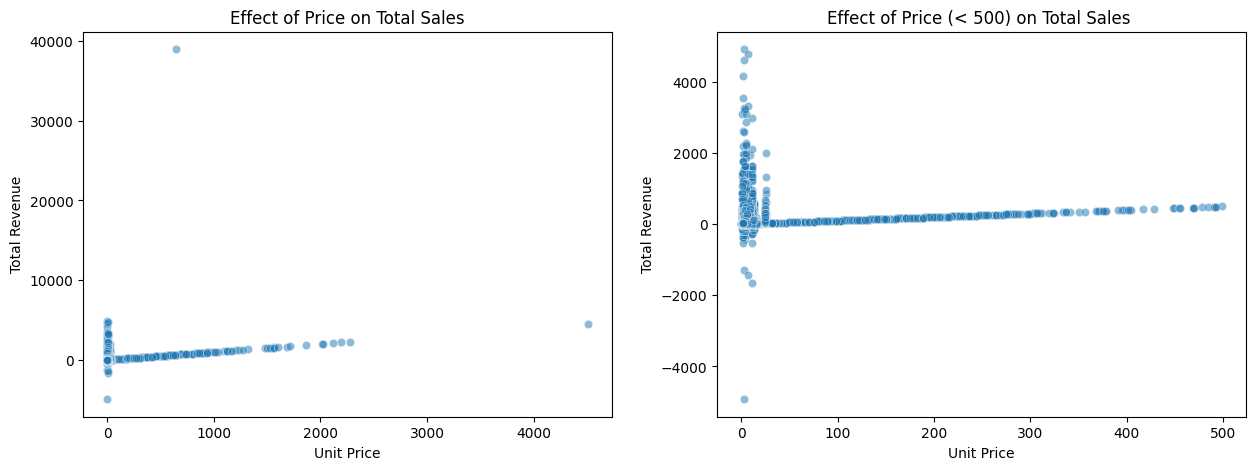

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=uk_retail_df['UnitPrice'], y=uk_retail_df['TotalRevenue'], alpha=0.5)
plt.xlabel("Unit Price")
plt.ylabel("Total Revenue")
plt.title("Effect of Price on Total Sales")

plt.subplot(1, 2, 2)
sns.scatterplot(x=uk_retail_df[uk_retail_df['UnitPrice']<500]['UnitPrice'], y=uk_retail_df['TotalRevenue'], alpha=0.5)
plt.xlabel("Unit Price")
plt.ylabel("Total Revenue")
plt.title("Effect of Price (< 500) on Total Sales ")


plt.show()

# Predictive Model for Estimating Price Elasticity by SKU

### Data cleaning

In [9]:
#Check for duplicate rows
duplicate_rows_df = uk_retail_df[uk_retail_df.duplicated()]
print("number of duplicate rows: ", len(duplicate_rows_df))
# Remove duplicate rows
uk_retail_df = uk_retail_df[~uk_retail_df.duplicated()]

# check null values
print("Null values count in features\n",uk_retail_df.isnull().sum()) 
# Drop description missing rows
uk_retail_df = uk_retail_df.dropna(subset=['Description'])


number of duplicate rows:  131
Null values count in features
 InvoiceNo            0
StockCode            0
Description         30
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID        4676
Country              0
TotalRevenue         0
Month_name           0
DayOfWeek_name       0
dtype: int64


### Feature Engineering

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
uk_retail_df['StockCode'] = uk_retail_df['StockCode'].astype(str)

# assuming time-based trend matters (if not, I could use days diiference from a referencce date)
uk_retail_df['year'] = uk_retail_df['InvoiceDate'].apply(lambda x: x.year)
uk_retail_df['Month'] = uk_retail_df['InvoiceDate'].apply(lambda x: x.month)
uk_retail_df['Day'] = uk_retail_df['InvoiceDate'].apply(lambda x: x.day)
uk_retail_df['DayOfWeek'] = uk_retail_df['InvoiceDate'].apply(lambda x: x.dayofweek)

# add features as previous price and quantity
uk_retail_df['PrevPrice'] = uk_retail_df.groupby('StockCode')['UnitPrice'].shift(1)
uk_retail_df['PrevQuantity'] = uk_retail_df.groupby('StockCode')['Quantity'].shift(1)

# Compute % Change in Quantity and Price for Each SKU
uk_retail_df.sort_values(['StockCode', 'InvoiceDate'], inplace=True)
uk_retail_df['Price_Change'] = uk_retail_df.groupby('StockCode')['UnitPrice'].pct_change() * 100
uk_retail_df['Quantity_Change'] = uk_retail_df.groupby('StockCode')['Quantity'].pct_change() * 100

uk_retail_df['Price_Change'].replace([np.inf, -np.inf], np.nan, inplace=True)
uk_retail_df.dropna(subset=['Price_Change', 'Quantity_Change'], inplace=True)

uk_retail_df['PriceElasticity'] = uk_retail_df['Quantity_Change'] / uk_retail_df['Price_Change']

uk_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Month_name,DayOfWeek_name,year,Month,Day,DayOfWeek,PrevPrice,PrevQuantity,Price_Change,Quantity_Change,PriceElasticity
3064,536595,21137,BLACK RECORD COVER FRAME,60,2010-12-01 17:24:00,3.39,13576.0,United Kingdom,203.40,2010-12,Wednesday,2010,12,1,2,3.39,480.0,0.000000,-87.500000,-inf
3270,536616,21137,BLACK RECORD COVER FRAME,72,2010-12-02 10:10:00,3.39,17925.0,United Kingdom,244.08,2010-12,Thursday,2010,12,2,3,3.39,60.0,0.000000,20.000000,inf
4207,536754,21137,BLACK RECORD COVER FRAME,1,2010-12-02 14:09:00,3.75,14449.0,United Kingdom,3.75,2010-12,Thursday,2010,12,2,3,3.39,72.0,10.619469,-98.611111,-9.285880
9282,537196,21137,BLACK RECORD COVER FRAME,24,2010-12-05 13:55:00,3.39,15426.0,United Kingdom,81.36,2010-12,Sunday,2010,12,5,6,3.75,1.0,-9.600000,2300.000000,-239.583333
10279,537237,21137,BLACK RECORD COVER FRAME,1,2010-12-06 09:58:00,7.62,NaN,United Kingdom,7.62,2010-12,Monday,2010,12,6,0,3.39,24.0,124.778761,-95.833333,-0.768026


### Building a gradient boosting regressor

#### Model training

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb


uk_retail_df['StockCode'] = uk_retail_df['StockCode'].astype('category')  # Convert to category
uk_retail_df['DayOfWeek'] = uk_retail_df['DayOfWeek'].astype('category')  # Convert to category
uk_retail_df['Month'] = uk_retail_df['Month'].astype('category')  # Convert to category

# Select Features
features = ['StockCode', 'UnitPrice', 'PrevPrice', 'Price_Change', 'DayOfWeek', 'Month']
X = uk_retail_df[features]
y = uk_retail_df['Quantity']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(tree_method="hist", enable_categorical=True,n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)

xgb_model.fit(X_train, y_train)

# Predict on Test Data
y_pred = xgb_model.predict(X_test)



#### Model evaluation

Mean Absolute Error: 12.0108
Mean Squared Error: 6836.1773


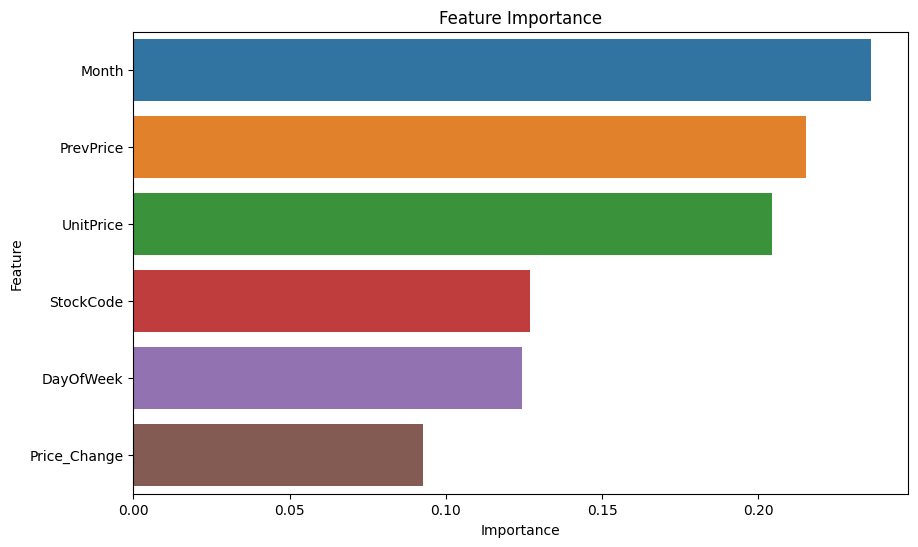

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f"Mean Squared Error: {mse:.4f}")
#print(f'R-squared: {r2}')

# 8. Feature Importance
importances = xgb_model.feature_importances_

# Plotting the feature importance
feature_names = X.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()

### Try random forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

lbl = LabelEncoder()
X_rf=X.copy(deep=True)
X_rf = pd.get_dummies(X[['StockCode', 'DayOfWeek', 'Month']], drop_first=True)

# Encoding StockCode and other categorical columns
#X_rf['StockCode'] = lbl.fit_transform(X_rf['StockCode'])
#X_rf['DayOfWeek'] = lbl.fit_transform(X_rf['DayOfWeek'])
#X_rf['Month'] = lbl.fit_transform(X_rf['Month'])

X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)


print(f'Mean Absolute Error: {mae:.4f}')
print(f"Mean Squared Error: {mse:.4f}")



# Combine XGBoost and RandomForest predictions
#final_pred = 0.5 * y_pred + 0.5 * rf_pred

Mean Absolute Error: 19.6528
Mean Squared Error: 7781.4592


### Limitations of the model and improvement

#### 1: scaling numerical values + filtering negative Quantity

In [14]:
uk_retail_df_improve = uk_retail_df[uk_retail_df['Quantity']>0].copy(deep=True)
display(uk_retail_df_improve.groupby(['StockCode'])['Quantity'].sum())
from sklearn.preprocessing import StandardScaler

# Feature scaling for continuous variables
scaler = StandardScaler()
uk_retail_df_improve[['UnitPrice', 'Price_Change']] = scaler.fit_transform(uk_retail_df_improve[['UnitPrice', 'Price_Change']])


StockCode
21137     10823
22086     18430
22114      5277
22178     23651
22197     53220
22386     19365
22423     11007
22469     17482
22502      1798
23084     15352
23203     17948
23284      5330
23298      7403
47566     16960
79321      9932
82484      5886
84879     33568
85099B    44059
85123A    39439
DOT         705
Name: Quantity, dtype: int64

#### 2: Removing outliers

In [15]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_quantity = uk_retail_df_improve['Quantity'].quantile(0.25)
Q3_quantity = uk_retail_df_improve['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_price = uk_retail_df_improve['UnitPrice'].quantile(0.25)
Q3_price = uk_retail_df_improve['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define the outlier thresholds
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Remove outliers in Quantity and UnitPrice
uk_retail_df_improve = uk_retail_df_improve[
    (uk_retail_df_improve['Quantity'] >= lower_bound_quantity) & 
    (uk_retail_df_improve['Quantity'] <= upper_bound_quantity) &
    (uk_retail_df_improve['UnitPrice'] >= lower_bound_price) &
    (uk_retail_df_improve['UnitPrice'] <= upper_bound_price)
]

#### 3: Log Transformation of Quantity ( If Quantity is highly skewed or has outliers)

             InvoiceDate  Quantity
5016 2011-09-01 11:33:00       112
196  2010-12-06 16:57:00       111
6304 2011-10-20 13:07:00       102
4206 2011-07-19 11:47:00       100
2798 2011-05-16 09:57:00        90
             InvoiceDate  Quantity
2126 2011-04-11 15:59:00         1
833  2011-01-21 14:04:00         1
7300 2011-11-16 16:30:00         1
2122 2011-04-11 14:00:00         1
3406 2011-06-09 16:07:00         1


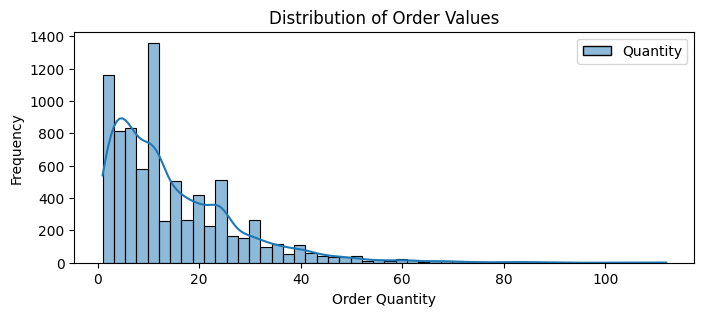

In [16]:
# Convert InvoiceDate to datetime if not already
uk_retail_df_improve['InvoiceDate'] = pd.to_datetime(uk_retail_df_improve['InvoiceDate'])

# Group by date and sum the quantities for each day
quantity_by_date = uk_retail_df_improve.groupby('InvoiceDate')['Quantity'].sum().reset_index()
order_quan=quantity_by_date.sort_values(by='Quantity',ascending=False)
print(order_quan.head(5))
print(order_quan.tail(5))

plt.figure(figsize=(8, 3))
sns.histplot(order_quan, bins=50, kde=True, color='purple')
plt.xlabel("Order Quantity")
plt.ylabel("Frequency")
plt.title("Distribution of Order Values")
plt.show()

#### Re train the model

,UnitPrice,PrevPrice,PrevQuantity,Price_Change,Quantity
UnitPrice,1.000000,0.252535,-0.081058,0.235896,-0.260339
PrevPrice,0.252535,1.000000,-0.039689,-0.155298,-0.070718
PrevQuantity,-0.081058,-0.039689,1.000000,0.092147,0.055386
Price_Change,0.235896,-0.155298,0.092147,1.000000,-0.157545
Quantity,-0.260339,-0.070718,0.055386,-0.157545,1.000000


Mean Absolute Error: 0.6745
Mean Squared Error: 0.6616


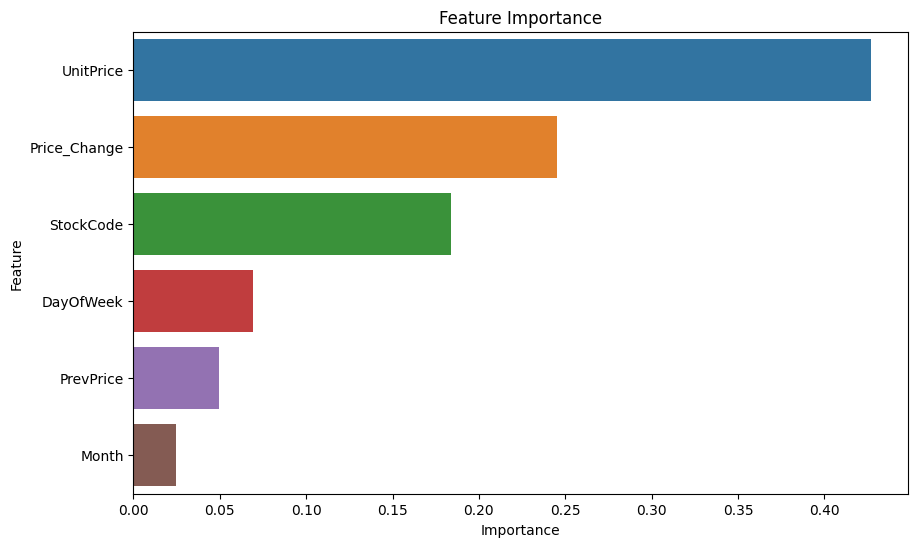

In [17]:

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb

uk_retail_df_improve['StockCode'] = uk_retail_df_improve['StockCode'].astype('category')  # Convert to category
uk_retail_df_improve['DayOfWeek'] = uk_retail_df_improve['DayOfWeek'].astype('category')  # Convert to category
uk_retail_df_improve['Month'] = uk_retail_df_improve['Month'].astype('category')  # Convert to category

# Select Features
features = ['StockCode', 'UnitPrice', 'PrevPrice', 'Price_Change', 'DayOfWeek', 'Month']
X = uk_retail_df_improve[features]
y = np.log1p(uk_retail_df_improve['Quantity']).ravel()

display(uk_retail_df_improve[['StockCode', 'UnitPrice', 'PrevPrice', 'PrevQuantity', 'Price_Change', 'DayOfWeek', 'Month','Quantity']].corr())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(tree_method="hist", enable_categorical=True,n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)

xgb_model.fit(X_train, y_train)

# Predict on Test Data
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f'Mean Absolute Error: {mae:.4f}')
print(f"Mean Squared Error: {mse:.4f}")

# 8. Feature Importance
importances = xgb_model.feature_importances_

# Plotting the feature importance
feature_names = X.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()



#### Re train Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

lbl = LabelEncoder()
X_rf=X.copy(deep=True)
X_rf = pd.get_dummies(X[['StockCode', 'DayOfWeek', 'Month']], drop_first=True)

# Encoding StockCode and other categorical columns
#X_rf['StockCode'] = lbl.fit_transform(X_rf['StockCode'])
#X_rf['DayOfWeek'] = lbl.fit_transform(X_rf['DayOfWeek'])
#X_rf['Month'] = lbl.fit_transform(X_rf['Month'])

X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)


print(f'Mean Absolute Error: {mae:.4f}')
print(f"Mean Squared Error: {mse:.4f}")



# Combine XGBoost and RandomForest predictions
final_pred = 0.5 * y_pred + 0.5 * rf_pred

mae = mean_absolute_error(y_test, final_pred)
mse = mean_squared_error(y_test, final_pred)


print(f'Combined Model Mean Absolute Error: {mae:.4f}')
print(f"Combined Model Mean Squared Error: {mse:.4f}")

Mean Absolute Error: 0.5704
Mean Squared Error: 0.4918
Combined Model Mean Absolute Error: 0.5756
Combined Model Mean Squared Error: 0.4959


#### 4: hyperparameter tuning

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    #'subsample': [0.7, 0.8, 0.9, 1.0],
    #'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

#param_grid = {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 200, 300]}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


# Predict on the best model 
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.4f}')
print(f"Mean Squared Error: {mse:.4f}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean Absolute Error: 0.5627
Mean Squared Error: 0.4665


#### 5: use CV


In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation scores: ", scores)
print("Mean MAE: ", np.mean(np.abs(scores)))

Cross-validation scores:  [-0.82927868 -0.74337814 -0.69526947 -0.80516195 -0.66886871]
Mean MAE:  0.7483913875914333


### Utilizing the model by the end users for decision making

/Users/shivarahimipour/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


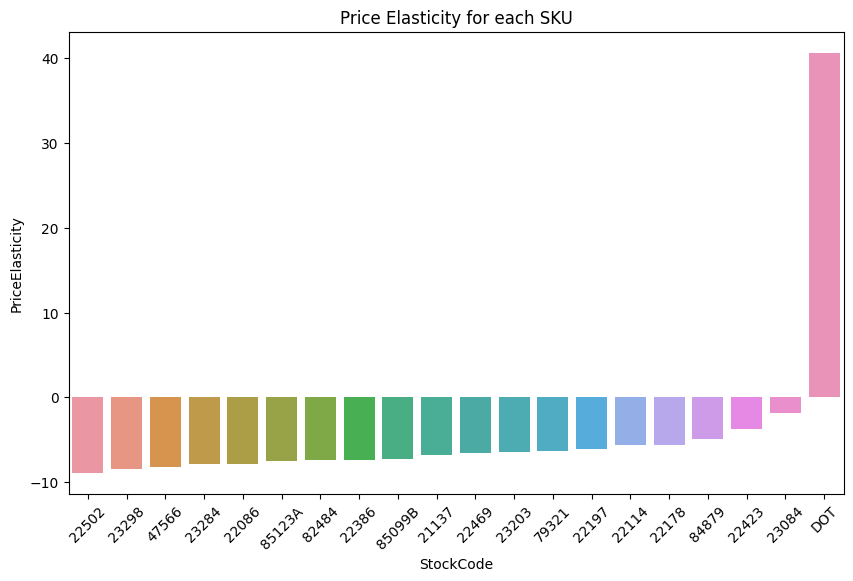

In [21]:
# calculating the price elasticity of demand: the percentage change in the quantity / the percentage change in the price.
# Create dataset with +1% price increase
X_new=X.copy(deep=True)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

X_test_new['UnitPrice'] *= 1.01  # Increase price by 1%

# Predict demand with new prices
y_pred_new = xgb_model.predict(X_test_new)

# Compute Elasticity
price_elasticity = (np.expm1(y_pred_new - y_pred) / np.expm1(y_pred)) / 0.01

# Convert to DataFrame
elasticity_df = pd.DataFrame({'StockCode': X_test_new.StockCode, 'PriceElasticity': price_elasticity})
elasticity_by_sku = elasticity_df.groupby('StockCode')['PriceElasticity'].mean().reset_index()

elasticity_by_sku = elasticity_by_sku.sort_values(by='PriceElasticity', ascending=True)  # Change to False for descending

plt.figure(figsize=(10, 6))
sns.barplot(x='StockCode', y='PriceElasticity', data=elasticity_by_sku,  order=elasticity_by_sku['StockCode'])
plt.title('Price Elasticity for each SKU')
plt.xticks(rotation=45)
plt.show()


- Elastic Products (PriceElasticity > 1): show high price sensitivity. Small price changes lead to significant changes in demand.
- Inelastic Products (PriceElasticity = 0): have no demand sensitivity to price changes, meaning quantity sold remains unaffected regardless of price changes.
- Negative Elasticity (PriceElasticity < 0): increasing the price leads to a decrease in demand, but the impact is moderate.
Moderate Elasticity (PriceElasticity between 0 and 1): have low to moderate price sensitivity, meaning demand changes somewhat with price but not drastically.


- - Dynamic Pricing: If you want to estimate how price changes in the future affect demand, the model could be used to predict elasticity for upcoming price changes.
- - Scenario Analysis: You can simulate different pricing scenarios to evaluate how changes in price could impact sales for each SKU.
- - Demand Forecasting: Forecast demand under different pricing scenarios.
- - Market Segmentation: Identify products with more elastic demand and adjust pricing strategies accordingly.

# Increase overall revenue with the new plan

## New pricing plan and the demand forecast

### Reformat the pricing plan file structure

In [22]:
pricing_df = pd.read_csv("Promo Plan.csv")
pricing_df.rename(columns={'Unnamed: 0': 'StockCode'}, inplace=True)
print(pricing_df.head(10))
# Melt the DataFrame to convert columns into rows
pricing_df = pricing_df.melt(id_vars=['StockCode'], var_name='InvoiceDate', value_name='UnitPrice')

# Convert 'InvoiceDate' to datetime format
pricing_df['InvoiceDate'] = pd.to_datetime(pricing_df['InvoiceDate'])

pricing_df.head(10)

  StockCode  12/1/2011  12/2/2011  12/3/2011  12/5/2011  12/6/2011  12/7/2011  \
0    85123A       1.61       1.60       1.82       1.84       3.60       1.84   
1     84879       0.94       0.86       1.60       0.94       1.63       0.77   
2     21212       0.67       0.68       1.88       0.80       0.60       0.84   
3     21977       0.64       0.50       1.51       0.68       0.66       1.43   
4    85099B       1.25       1.41       3.04       1.40       1.19       1.18   
5     22197       0.73       0.78       1.57       0.79       1.59       0.84   
6     22178       1.70       1.67       3.35       0.00       3.30       1.71   
7     22616       0.48       0.46       0.50       0.48       1.28       0.49   
8     17003       0.60       0.33       0.00       0.33       0.56       0.54   
9     84077       0.00       0.30       0.31       0.26       0.36       0.25   

   12/8/2011  12/9/2011  12/10/2011  ...  3/21/2012  3/22/2012  3/23/2012  \
0       1.86       1.86        

,StockCode,InvoiceDate,UnitPrice
0,85123A,2011-12-01,1.61
1,84879,2011-12-01,0.94
2,21212,2011-12-01,0.67
3,21977,2011-12-01,0.64
4,85099B,2011-12-01,1.25
5,22197,2011-12-01,0.73
6,22178,2011-12-01,1.70
7,22616,2011-12-01,0.48
8,17003,2011-12-01,0.60
9,84077,2011-12-01,0.00


### Transform pricing_df for Future Predictions

In [23]:
# Extract DayOfWeek and Month from InvoiceDate
pricing_df['DayOfWeek'] = pricing_df['InvoiceDate'].dt.dayofweek
pricing_df['Month'] = pricing_df['InvoiceDate'].dt.month

# Get PrevPrice (lagged price)
pricing_df['PrevPrice'] = pricing_df.groupby('StockCode')['UnitPrice'].shift(1)

# Compute % Change in Quantity and Price for Each SKU
pricing_df.sort_values(['StockCode', 'InvoiceDate'], inplace=True)
pricing_df['Price_Change'] = pricing_df.groupby('StockCode')['UnitPrice'].pct_change() * 100

pricing_df['Price_Change'].replace([np.inf, -np.inf], np.nan, inplace=True)
pricing_df['PrevPrice'].replace([np.inf, -np.inf], np.nan, inplace=True)

pricing_df.dropna(subset=['Price_Change','PrevPrice'], inplace=True)

###  Forecast Future Demand for Pricing Plan

In [24]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)

Q1_price = pricing_df['UnitPrice'].quantile(0.25)
Q3_price = pricing_df['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define the outlier thresholds
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Remove outliers in Quantity and UnitPrice
pricing_df = pricing_df[
    (pricing_df['UnitPrice'] >= lower_bound_price) &
    (pricing_df['UnitPrice'] <= upper_bound_price)
]

scaler = StandardScaler()
pricing_df[['UnitPrice', 'Price_Change']] = scaler.fit_transform(pricing_df[['UnitPrice', 'Price_Change']])

# Select features matching the training data
X_test_forecast = pricing_df[features]

# Ensure categorical encoding matches training
X_test_forecast['StockCode'] = X_test_forecast['StockCode'].astype('category')

# Predict future demand
pricing_df['Forecasted_Quantity'] = (xgb_model.predict(X_test_forecast))/10

/Users/shivarahimipour/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Compare demand caused by pricing plan and the historical demand

,StockCode,PriceElasticity
18,85123A,-7.543652
17,85099B,-7.288761
4,22197,-6.126848
3,22178,-5.569118
16,84879,-4.882817


<bound method DataFrame.info of   StockCode  Forecasted_Quantity
0     17003             4.527508
1     21212             9.387033
2     21977            11.888443
3     22178             7.295568
4     22197            10.291128
5     22616             7.826352
6     84077             6.100626
7     84879            10.311294
8    85099B             8.654571
9    85123A             8.433673>

,StockCode,Quantity,Forecasted_Quantity
0,22178,9.038009,7.295568
1,22197,9.215029,10.291128
2,84879,9.528649,10.311294
3,85099B,9.443593,8.654571
4,85123A,9.299724,8.433673


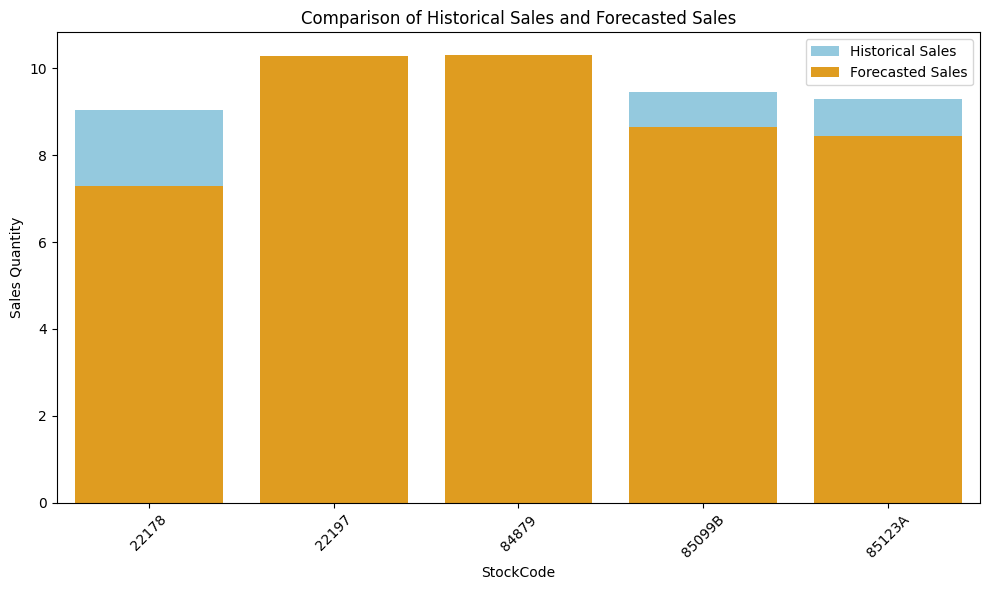

In [25]:
top_10_items = pricing_df['StockCode'].unique()
elas=elasticity_by_sku[elasticity_by_sku['StockCode'].isin(top_10_items)]
display(elas)

# Step 2: Summarize the historical sales for these items
historical_sales = uk_retail_df_improve[uk_retail_df_improve['StockCode'].isin(top_10_items)]
historical_sales_summary = historical_sales.groupby('StockCode')['Quantity'].sum().reset_index()
historical_sales_summary['Quantity'] = historical_sales_summary['Quantity'].apply(np.log1p)

#display(historical_sales_summary.info)

# Step 3: Compare historical sales with forecasted quantities in pricing_df
forecasted_sales_summary = pricing_df.groupby('StockCode')['Forecasted_Quantity'].sum().reset_index()
display(forecasted_sales_summary.info)


# Step 4: Merge the historical sales with forecasted quantities
comparison_df = pd.merge(historical_sales_summary, forecasted_sales_summary, on='StockCode', how='inner')
display(comparison_df)
plt.figure(figsize=(10, 6))

# Step 3: Create a bar plot to compare historical sales and forecasted quantities
sns.barplot(x='StockCode', y='Quantity', data=comparison_df, color='skyblue', label='Historical Sales')
sns.barplot(x='StockCode', y='Forecasted_Quantity', data=comparison_df, color='orange', label='Forecasted Sales')

# Step 4: Add labels and title
plt.xlabel('StockCode')
plt.ylabel('Sales Quantity')
plt.title('Comparison of Historical Sales and Forecasted Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Step 5: Display the plot
plt.tight_layout()
plt.show()


## Recommendation for the sales team to use this plan or not

Elasticity Impact is used to understand whether the price change is expected to increase or decrease the demand.
Elasticity_Impact = PriceElasticity * Price_Change

Recommendation logic:
"Adopt new pricing plan": If the forecasted quantity is higher than the historical sales and the elasticity impact is positive (indicating that the price change will result in a favorable increase in demand), the new pricing plan can be adopted.
"Reconsider new pricing plan": If the forecasted quantity is higher but the elasticity impact is negative (suggesting that the price change may result in a decrease in demand), the sales team should reconsider the plan.
"Do not adopt new pricing plan": If the forecasted quantity is not higher or the price change leads to no significant demand increase, the new plan should not be adopted.


# Try LSTM

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = uk_retail_df.copy(deep=True)

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate data by day or week (based on your choice)
df_daily = df.groupby([df['StockCode'], df['InvoiceDate'].dt.date]).agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'TotalRevenue': 'sum'
}).reset_index()

# Calculate percentage changes (for price elasticity)
df_daily['PriceChange'] = df_daily['UnitPrice'].pct_change()
df_daily['QuantityChange'] = df_daily['Quantity'].pct_change()

# Drop rows where Quantity or UnitPrice is missing
df_daily.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)

# Normalize the UnitPrice data
scaler = MinMaxScaler()
scaled_price = scaler.fit_transform(df_daily[['UnitPrice']])

# One-hot encode the StockCode
encoder = OneHotEncoder(sparse=False)
encoded_stock = encoder.fit_transform(df_daily[['StockCode']])

# Prepare the data for LSTM
def create_sequences(data, time_steps=5):
    X = []
    y = []
    for i in range(time_steps, len(data)):
        X.append(np.concatenate((data[i-time_steps:i, 0].reshape(-1, 1), data[i-time_steps:i, 1:]), axis=1))  # Concatenate UnitPrice and StockCode
        y.append(df_daily['Quantity'].iloc[i])  # Quantity as the target
    return np.array(X), np.array(y)

# Combine the scaled prices and encoded stock codes into a single data array
combined_data = np.hstack((scaled_price, encoded_stock))  # Concatenate UnitPrice and StockCode

# Create sequences based on UnitPrice and StockCode
X, y = create_sequences(combined_data)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output: predicted Quantity

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)
display(X_test.shape)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate price elasticity based on predicted and actual quantities
# Use the formula for price elasticity: % change in quantity / % change in price
price_change_test = df_daily['PriceChange'].iloc[train_size:train_size + len(y_pred)].values
quantity_change_test = (y_pred.flatten() - y_test) / y_test
price_elasticity = quantity_change_test / price_change_test

print("Price Elasticity:", price_elasticity)


2025-03-06 10:12:36.250980: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
116/116 [==============================] - 3s 3ms/step - loss: 30980.2129
Epoch 2/20
116/116 [==============================] - 0s 3ms/step - loss: 29608.2520
Epoch 3/20
116/116 [==============================] - 0s 3ms/step - loss: 29064.3613
Epoch 4/20
116/116 [==============================] - 0s 3ms/step - loss: 28627.9219
Epoch 5/20
116/116 [==============================] - 0s 3ms/step - loss: 28266.6328
Epoch 6/20
116/116 [==============================] - 0s 3ms/step - loss: 27976.3184
Epoch 7/20
116/116 [==============================] - 0s 3ms/step - loss: 27738.3008
Epoch 8/20
116/116 [==============================] - 0s 4ms/step - loss: 27543.9199
Epoch 9/20
116/116 [==============================] - 0s 3ms/step - loss: 27385.6777
Epoch 10/20
116/116 [==============================] - 0s 3ms/step - loss: 27257.7109
Epoch 11/20
116/116 [==============================] - 0s 3ms/step - loss: 27149.5996
Epoch 12/20
116/116 [==============================] - 0s 3ms/s

(924, 5, 21)

29/29 [==============================] - 0s 1ms/step
Price Elasticity: [ 2.47721471e+01 -7.73378849e+00  2.32527428e+02  1.70220120e+16
  5.72888667e+00  1.02680368e+02 -1.75560761e+15             inf
             inf  9.84680666e+15 -9.51468392e-01 -3.06715932e+00
            -inf             inf            -inf             inf
            -inf             inf  2.80428979e+00 -1.93185183e+00
  1.07851085e+01 -2.50633400e+01 -3.17768289e+01             inf
            -inf            -inf             inf  5.56514228e+01
 -1.96492421e+00 -2.69643249e+00 -1.86305070e+02  3.00102013e+00
  4.41610220e+00 -9.02212342e-01  1.17115989e+01             inf
             inf -8.21328829e+15             inf  8.23287249e+14
  1.34387714e+15             inf             inf -3.54690587e+15
 -3.40440196e+16  3.86675418e+15 -2.16067615e+15             inf
 -5.21391696e+00 -6.60580074e+00  3.96953762e+14            -inf
  4.10664415e+15             inf -2.51842329e+00  1.44178836e+00
  2.52359867e+01 -1

/Users/shivarahimipour/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in true_divide
/Users/shivarahimipour/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide


In [28]:
# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 48102.8247
Mean Absolute Error (MAE): 89.9113
